# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns   
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import preprocessor as p 
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [31]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\booma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\booma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\booma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\booma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Scraping

In [32]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [33]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The check in process and rew...
1,"✅ Trip Verified | We flew in November 2023, ..."
2,✅ Trip Verified | I left for London from Johan...
3,✅ Trip Verified | After an excellent flight ...
4,✅ Trip Verified | On a recent flight from Cy...


In [34]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Load data

In [35]:
data = pd.read_csv("BA_reviews.csv")
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | The check in process and rew...
1,1,"✅ Trip Verified | We flew in November 2023, ..."
2,2,✅ Trip Verified | I left for London from Johan...
3,3,✅ Trip Verified | After an excellent flight ...
4,4,✅ Trip Verified | On a recent flight from Cy...


# Data Understanding

In [36]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [37]:
data.isna().sum()

reviews    0
dtype: int64

# Preprocess

In [38]:
import re

def clean_text(text):
    """
    Cleans the input text by removing unwanted elements such as mentions, URLs, special characters, 
    and specific phrases. Also converts the text to lowercase.
    """
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove retweet indicators (e.g., "RT")
    text = re.sub(r'\bRT\b', '', text)
    
    # Remove URLs (both http and https)
    text = re.sub(r'http\S+|https\S+', '', text)
    
    # Remove specific phrase "✅ Trip Verified |" (with possible leading/trailing spaces)
    text = re.sub(r'\s*✅ Trip Verified \|\s*', '', text)
    
    # Replace "/" with a space
    text = text.replace('/', ' ')
    
    # Remove all non-word characters except spaces
    text = re.sub(r'[^\w\s]', '', text)
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    
    # Remove digits
    text = re.sub(r'\d', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Strip leading/trailing spaces for clean output
    text = text.strip()

    return text


In [39]:
data['reviews'] = data['reviews'].apply(clean_text)

In [40]:
data.head()

,reviews
0,the check in process and reward loyalty progra...
1,we flew in november but it took this long to ...
2,i left for london from johannesburg at on de...
3,after an excellent flight on a cpt to lhr the...
4,on a recent flight from cyprus ba on the se...


# EDA

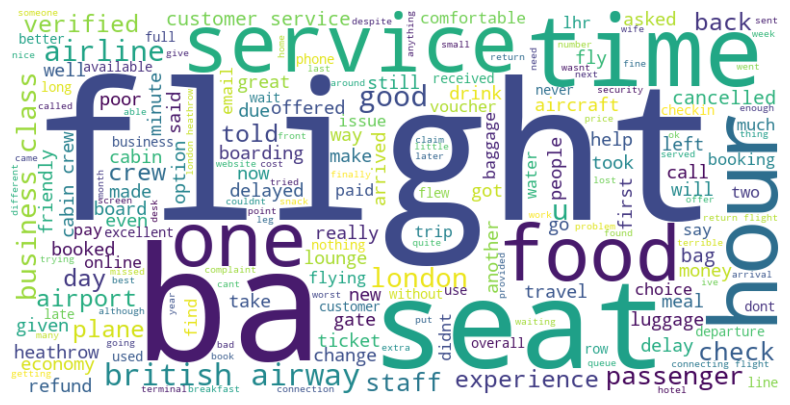

In [41]:
text = ' '.join(data['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# from spellchecker import SpellChecker

# # Inisialisasi spell checker
# spell = SpellChecker()

# data['reviews'] = data['reviews'].apply(
#     lambda x: " ".join( 
#         spell.correction(word) if spell.correction(word) != None else word for word in x.split()
#     )
# )

In [43]:
# text = ' '.join(data['reviews'])
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# # Menampilkan Word Cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [44]:
# data.to_csv("BA_reviews_cleaned.csv")

# Read data again

In [45]:
# data_cleaned = pd.read_csv("BA_reviews_cleaned.csv")

## Preprocessing

In [46]:
stop_words = set(stopwords.words('english'))  # Stopwords
stemmer = PorterStemmer()                     # Stemming
lemmatizer = WordNetLemmatizer()              # Lemmatization?

In [47]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    preprocessed_text = " ".join(tokens)
    
    return preprocessed_text
data['reviews'] = data['reviews'].apply(preprocess_text)

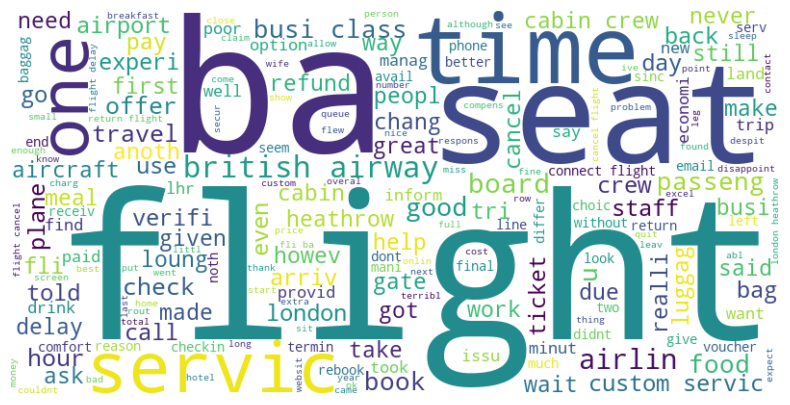

In [48]:
text = ' '.join(data['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Nilai -1 (negatif) hingga 1 (positif)
    return sentiment

df['sentiment'] = df['reviews'].apply(get_sentiment)

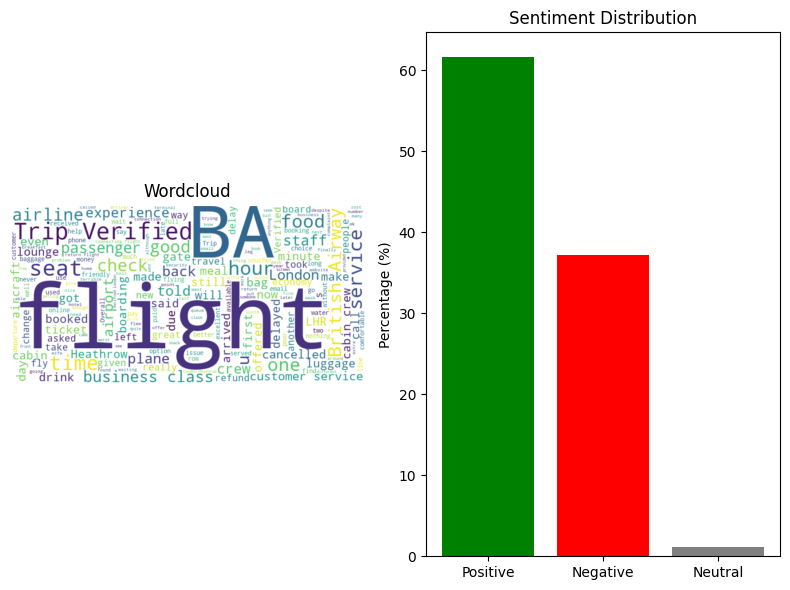

Positive Sentiment: 61.60%
Negative Sentiment: 37.20%
Neutral Sentiment: 1.20%


In [55]:
# Menghitung persentase sentimen
positive_sentiment = len(df[df['sentiment'] > 0]) / len(df) * 100
negative_sentiment = len(df[df['sentiment'] < 0]) / len(df) * 100
neutral_sentiment = 100 - positive_sentiment - negative_sentiment

# Langkah 4: Membuat WordCloud
text = " ".join(df['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(8, 6))

# Menampilkan WordCloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud")

# Menampilkan Sentimen
plt.subplot(1, 2, 2)
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_values = [positive_sentiment, negative_sentiment, neutral_sentiment]
plt.bar(sentiment_labels, sentiment_values, color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.show()

# Output Metrics Sentimen
print(f"Positive Sentiment: {positive_sentiment:.2f}%")
print(f"Negative Sentiment: {negative_sentiment:.2f}%")
print(f"Neutral Sentiment: {neutral_sentiment:.2f}%")

In [49]:
# norm = {
#     'u': 'you',
#     'aiarecareaft' : 'area care aft',
#     'differ': 'different',
#     'minut': 'minute',
#     'little': 'little',
#     'fli' : 'flight',
#     'receive': 'receive',
#     'wasnt': 'was not',
#     'r': 'are',
#     'ur': 'your',
#     'b4': 'before',
#     'gr8': 'great',
#     'pls': 'please',
#     'plz': 'please',
#     'idk': 'i don’t know',
#     'btw': 'by the way',
#     'thx': 'thanks',
#     'ty': 'thank you',
#     'lol': 'laugh out loud',
#     'omg': 'oh my god',
#     'lmao': 'laughing my ass off',
#     'rofl': 'rolling on the floor laughing',
#     'brb': 'be right back',
#     'bff': 'best friends forever',
#     'afaik': 'as far as i know',
#     'imho': 'in my humble opinion',
#     'irl': 'in real life',
#     'tbh': 'to be honest',
#     'nvm': 'never mind',
#     'wanna': 'want to',
#     'gonna': 'going to',
#     'lemme': 'let me',
#     'gotta': 'got to',
#     'yall': 'you all',
#     'serv' : 'serve',
#     'tho': 'though',
#     'cuz': 'because',
#     'coz': 'because',
#     'gimme': 'give me',
#     'kinda': 'kind of',
#     'sorta': 'sort of',
#     'ain’t': 'is not',
#     'dont': 'do not',
#     'cant': 'cannot',
#     'wont': 'will not',
#     'shouldnt': 'should not',
#     'couldnt': 'could not',
#     'wouldnt': 'would not',
#     'didnt': 'did not',
#     'havent': 'have not',
#     'hasnt': 'has not',
#     'aint': 'is not',
#     'idc': 'i don’t care',
#     'omw': 'on my way',
#     'smh': 'shaking my head',
#     'tldr': 'too long didn’t read',
#     'btwn': 'between',
#     'yolo': 'you only live once',
#     'fyi': 'for your information',
#     'icymi': 'in case you missed it',
#     'np': 'no problem',
#     'gg': 'good game',
#     'sup': 'what’s up',
#     'lmk': 'let me know',
#     'imo': 'in my opinion',
#     'hmu': 'hit me up',
#     'jk': 'just kidding',
#     'idc': 'i don’t care',
#     'ikr': 'i know right',
#     'tysm': 'thank you so much',
#     'ttyl': 'talk to you later',
#     'wb': 'welcome back',
#     'gl': 'good luck',
#     'hf': 'have fun',
#     'ggwp': 'good game well played',
#     'rn': 'right now',
#     'afk': 'away from keyboard',
#     'ily': 'i love you',
#     'bruh': 'brother',
#     'fam': 'family',
#     'tho': 'though',
#     'ok': 'okay',
#     'okie': 'okay',
#     'ikr': 'i know right',
#     'bc': 'because',
#     'u2': 'you too',
#     'np': 'no problem',
#     'omg': 'oh my god',
#     'idk': 'i don’t know',
#     'btw': 'by the way',
#     'fyi': 'for your information',
#     'passeng' : 'passenger',
#     'caareeew' : 'career',
#     'comfoaareet' : 'comfortable',
#     'baareeitish' : 'british',
#     'boaaareed' : 'bored',
#     'peopl' : 'people',
#     'yoyouse': 'you use',
#     'offeaaree': 'offering',
#     'aiaareeway': 'airway',
#     'woyoyould': 'would',
#     'howev': 'however',
#     'flightght': 'flight',
#     'althoughyoughyoyough': 'although',
#     'gameag': 'game',
#     'loyoyoung': 'young',
#     'myoyouch': 'my touch',
#     'aareeethank': 'thank',
#     'aiaareepoaareet': 'apartment',
#     'aiaareelin': 'alien',
#     'coyoyould': 'could',
#     'byoyousi': 'busy',
#     'taareeavel': 'travel',
#     'woaareek': 'week',
#     'okayay': 'okay',
#     'aareeealli': 'really',
#     'faaaree': 'fare',
#     'bagood': 'good',
#     'bookayay': 'book',
#     'flightghtght' : 'flight',
#     'yoyou': 'you',
#     'qyoyoyouit': 'quit',
#     'cloyoyoyoub': 'cloud',
#     'yoyoyou': 'you',
#     'offeaaareee': 'offering',
#     'aaareeeeview': 'review',
#     'veaaareeeifi': 'verify',
#     'aiaaareeeway': 'airway',
#     'baaareeeitish': 'British',
#     'caaareeeew': 'career',
#     'fiaaareeest': 'fiest',
#     'seaaareeev': 'severe',
#     'cyoyoyoustom': 'custom',
#     'seaaareeevic': 'service',
#     'aaareeeoyoyoyout': 'about',
#     'cloyoyoyoub': 'cloud',
#     'pyoyoyout': 'output',
#     'seaaareeevic': 'service',
#     'aaareeeerhank': 'thank',
#     'byoyoyousi': 'busy',
#     'coyoyoyould': 'could',
#     'aaareeeealli': 'really',
#     'aaareeeaareeeiv': 'arrive',
#     'avail': 'avail',
#     'offeaaareee': 'offering',
#     'noth': 'nothing',
#     'oveaaareeeal': 'overall',
#     'aiaaareeepoaaareeet': 'apartment',
#     'paaareeemiyoyoyoum': 'apartment',
#     'myoyoyouch': 'my touch',
#     'taaareeeavel': 'travel',
#     'caree': 'care',
#     'lookay': 'look',
#     'aareea': 'area',
#     'aaareeaareeiv': 'arrive',
#     'goyouaaree': 'go you',
#     'choh': 'choke',
#     'betteaaree': 'better',
#     'baareeeakfast': 'breakfast',
#     'gaareeeat': 'great',
#     'cyoustom': 'custom',
#     'seaareevic': 'service',
#     'seaareevic': 'service',
#     'heathaareeow': 'health',
#     'seaareev': 'severe',
#     'hoyouaaree': 'how are you',
#     'depaareethank': 'department',
#     'youoyouaaree': 'your',
#     'paareeoblem': 'problem',
#     'infoaareem': 'inform',
#     'aareeoyout': 'about',
#     'woaareeld': 'world',
#     'tookay': 'okay',
#     'chang': 'change',
#     'myouchall': 'mychal',
#     'aareeeason': 'reason',
#     'aareeview': 'review',
#     'paareeemiyoum': 'apartment',
#     'expaareei': 'experience',
#     'youoyouaareen': 'your again',
#     'taareei': 'treat',
#     'fiaareest': 'fiest',
#     'bookay': 'book',
#     'gyouessht': 'guess',
#     'youoyoual': 'usual',
#     'inflight': 'in flight',
#     'clyoub': 'cloud',
#     'lyougood': 'you good',
#     'boareed': 'bored',
#     'heathaaareeeow': 'health',
#     'woyould': 'would',
#     'caareeeare': 'care',
#     'passengereare': 'passenger',
#     'youoyouaaareeen': 'your again',
#     'caaareee': 'care',
#     'aaareeea': 'area',
#     'peoplee': 'people',
#     'apaartement': 'apartment',
#     'paaareeeoblem': 'problem',
#     'offeareing': 'offering',
#     'howevereare': 'however',
#     'fiest': 'first',  # Assume 'fiest' should be 'first', adjust based on context
#     'tareavel': 'travel',
#     'toyouch': 'touch',
#     'areeally': 'really',
#     'ba': 'ba',  # Keep as 'ba' if context is ambiguous
#     'althoughyough': 'although',
#     'diffeaaareee': 'difference',
#     'severeic': 'service',
#     'infoaaareeem': 'inform',
#     'xpeaaareeei': 'experience',
#     'staaareeet': 'street',
#     'depaathank': 'department',
#     'byousy': 'busy',
#     'youse': 'you',
#     'bareitish': 'british',
#     'woaaareeeld': 'world',
#     'taaareeei': 'treat',
#     'pooaaareee': 'poetry',
#     'daaareeeink': 'drinking',
#     'baaareeeeakfast': 'breakfast',
#     'standaaaareeed': 'standard',
#     'careeeare': 'care',
#     'coyould': 'could',
#     'teaaareeemin': 'termin',
#     'aft': 'after',
#     'peoplee': 'people'
# }

# def normalisasi(str_text):
#     for i in norm:
#         str_text = str_text.replace(i, norm[i])  # Ganti kata sesuai kamus norm
#     return str_text  # Mengembalikan teks yang sudah dinormalisasi
# data['reviews'] = data['reviews'].apply(normalisasi)


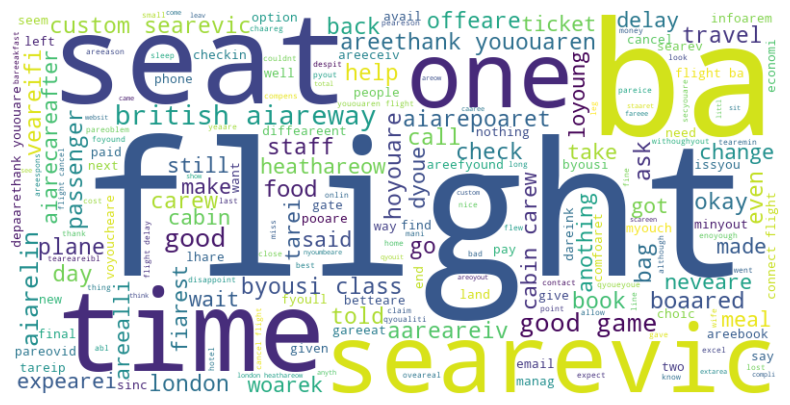

In [50]:
text = ' '.join(data['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# norm = {
#     'u': 'you',
#     'aiarecareaft' : 'area care aft',
#     'differ': 'different',
#     'minut': 'minute',
#     'little': 'little',
#     'fli' : 'flight',
#     'receive': 'receive',
#     'wasnt': 'was not',
#     'r': 'are',
#     'ur': 'your',
#     'b4': 'before',
#     'gr8': 'great',
#     'pls': 'please',
#     'plz': 'please',
#     'idk': 'i don’t know',
#     'btw': 'by the way',
#     'thx': 'thanks',
#     'ty': 'thank you',
#     'lol': 'laugh out loud',
#     'omg': 'oh my god',
#     'lmao': 'laughing my ass off',
#     'rofl': 'rolling on the floor laughing',
#     'brb': 'be right back',
#     'bff': 'best friends forever',
#     'afaik': 'as far as i know',
#     'imho': 'in my humble opinion',
#     'irl': 'in real life',
#     'tbh': 'to be honest',
#     'nvm': 'never mind',
#     'wanna': 'want to',
#     'gonna': 'going to',
#     'lemme': 'let me',
#     'gotta': 'got to',
#     'yall': 'you all',
#     'serv' : 'serve',
#     'tho': 'though',
#     'cuz': 'because',
#     'coz': 'because',
#     'gimme': 'give me',
#     'kinda': 'kind of',
#     'sorta': 'sort of',
#     'ain’t': 'is not',
#     'dont': 'do not',
#     'cant': 'cannot',
#     'wont': 'will not',
#     'shouldnt': 'should not',
#     'couldnt': 'could not',
#     'wouldnt': 'would not',
#     'didnt': 'did not',
#     'havent': 'have not',
#     'hasnt': 'has not',
#     'aint': 'is not',
#     'idc': 'i don’t care',
#     'omw': 'on my way',
#     'smh': 'shaking my head',
#     'tldr': 'too long didn’t read',
#     'btwn': 'between',
#     'yolo': 'you only live once',
#     'fyi': 'for your information',
#     'icymi': 'in case you missed it',
#     'np': 'no problem',
#     'gg': 'good game',
#     'sup': 'what’s up',
#     'lmk': 'let me know',
#     'imo': 'in my opinion',
#     'hmu': 'hit me up',
#     'jk': 'just kidding',
#     'idc': 'i don’t care',
#     'ikr': 'i know right',
#     'tysm': 'thank you so much',
#     'ttyl': 'talk to you later',
#     'wb': 'welcome back',
#     'gl': 'good luck',
#     'hf': 'have fun',
#     'ggwp': 'good game well played',
#     'rn': 'right now',
#     'afk': 'away from keyboard',
#     'ily': 'i love you',
#     'bruh': 'brother',
#     'fam': 'family',
#     'tho': 'though',
#     'ok': 'okay',
#     'okie': 'okay',
#     'ikr': 'i know right',
#     'bc': 'because',
#     'u2': 'you too',
#     'np': 'no problem',
#     'omg': 'oh my god',
#     'idk': 'i don’t know',
#     'btw': 'by the way',
#     'fyi': 'for your information',
#     'passeng' : 'passenger',
#     'caareeew' : 'career',
#     'comfoaareet' : 'comfortable',
#     'baareeitish' : 'british',
#     'boaaareed' : 'bored',
#     'peopl' : 'people',
#     'yoyouse': 'you use',
#     'offeaaree': 'offering',
#     'aiaareeway': 'airway',
#     'woyoyould': 'would',
#     'howev': 'however',
#     'flightght': 'flight',
#     'althoughyoughyoyough': 'although',
#     'gameag': 'game',
#     'loyoyoung': 'young',
#     'myoyouch': 'my touch',
#     'aareeethank': 'thank',
#     'aiaareepoaareet': 'apartment',
#     'aiaareelin': 'alien',
#     'coyoyould': 'could',
#     'byoyousi': 'busy',
#     'taareeavel': 'travel',
#     'woaareek': 'week',
#     'okayay': 'okay',
#     'aareeealli': 'really',
#     'faaaree': 'fare',
#     'bagood': 'good',
#     'bookayay': 'book',
#     'flightghtght' : 'flight',
#     'yoyou': 'you',
#     'qyoyoyouit': 'quit',
#     'cloyoyoyoub': 'cloud',
#     'yoyoyou': 'you',
#     'offeaaareee': 'offering',
#     'aaareeeeview': 'review',
#     'veaaareeeifi': 'verify',
#     'aiaaareeeway': 'airway',
#     'baaareeeitish': 'British',
#     'caaareeeew': 'career',
#     'fiaaareeest': 'fiest',
#     'seaaareeev': 'severe',
#     'cyoyoyoustom': 'custom',
#     'seaaareeevic': 'service',
#     'aaareeeoyoyoyout': 'about',
#     'cloyoyoyoub': 'cloud',
#     'pyoyoyout': 'output',
#     'seaaareeevic': 'service',
#     'aaareeeerhank': 'thank',
#     'byoyoyousi': 'busy',
#     'coyoyoyould': 'could',
#     'aaareeeealli': 'really',
#     'aaareeeaareeeiv': 'arrive',
#     'avail': 'avail',
#     'offeaaareee': 'offering',
#     'noth': 'nothing',
#     'oveaaareeeal': 'overall',
#     'aiaaareeepoaaareeet': 'apartment',
#     'paaareeemiyoyoyoum': 'apartment',
#     'myoyoyouch': 'my touch',
#     'taaareeeavel': 'travel'
# }
